### Библиотеки

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import pickle
from Experiment_2d_advection import *

,value
param,
seed,1
method,E1
decay_const,9.000e-01
train_split,5.000e-01
m,1
epochs,100
l_wd,1.000e-07
fs,3
neurons,32


In [3]:
import sys
# sys.path.append(fr'/home/mex0/Documents/TukhbatullinAL/diplom_2/Git_stencil-net/Git_stencil-net/')
sys.path.append('D:\myProjects\diplom_2\GIT_stencil-net\GIT_stencil-net')
sys.path.append('D:\myProjects\diplom_2\GIT_stencil-net\GIT_stencil-net/4_2d_advection/')

import funcs_2d_advection as f2da

In [4]:
BC_TYPE='dirichlet'; BC_VALUES=[0,0]

### Описание эксперимента:

In [5]:
"""
2д решение задачи теплопроводности
"""

'\n2д решение задачи теплопроводности\n'

### 0. Параметры для генерации данных

In [6]:
# folder='Experiment_2d_advection'

folder='Experiment_2d_advection_square_0_2'

In [7]:
# epochs_lst=[100,1_000,5_000]
epochs_lst=[1_000]
# epochs_lst=[2]

### 1. Генерация данных

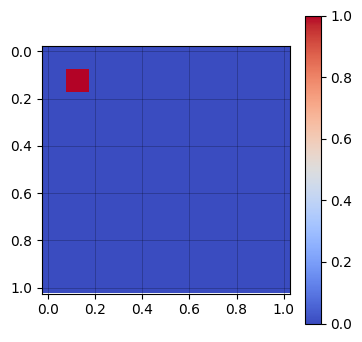

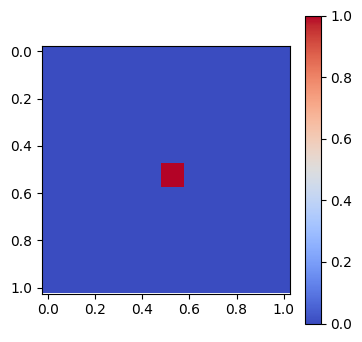

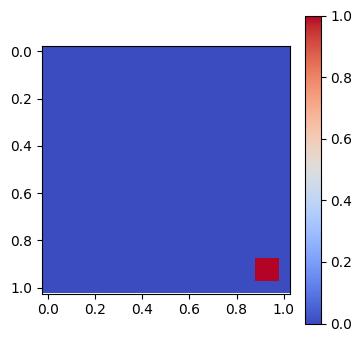

In [8]:
# n=11
n=21
# n=41
# n=81
# n=101 # didnt work

L=1
T=0.8
# T=0.75
h=L/(n-1)

kurant=1#0.1


tau=kurant*h

# b=(n-1)*0.1 #width % of L

# Точное решение
v_fact=np.array([f2da.exact_solution(n,n, np.round(t*tau,2) , 1, 1, 1, 1,square=0.15) for t in range(int((T+tau)/tau))])

cmap='coolwarm'
n_xticks=4
figsize=(4,4)
pre_xticks=np.arange(0,v_fact.shape[1],1)[0::n_xticks]
after_xticks=np.round(np.linspace(0,L,v_fact.shape[1])[0::n_xticks],1)

plt.figure(figsize=figsize)
plt.imshow(v_fact[0,:,:],cmap=cmap)
plt.xticks(pre_xticks,after_xticks)
plt.yticks(pre_xticks,after_xticks)
# Добавляем сетку
plt.grid(which='both', color='black', linestyle='-', linewidth=0.5, alpha=0.3)
plt.xticks(pre_xticks, after_xticks)
plt.yticks(pre_xticks, after_xticks)
plt.colorbar()


plt.figure(figsize=figsize)
plt.imshow(v_fact[int(v_fact.shape[0]/2),:,:],cmap=cmap)
plt.xticks(pre_xticks,after_xticks)
plt.yticks(pre_xticks,after_xticks)
plt.colorbar()

plt.figure(figsize=figsize)
plt.imshow(v_fact[-1,:,:],cmap=cmap)
plt.xticks(pre_xticks,after_xticks)
plt.yticks(pre_xticks,after_xticks)
plt.colorbar()

In [9]:
h,tau

(0.05, 0.05)

In [10]:
print('h',h,h**2)
print('tau',tau)
assert tau/h<=1,'не выполнено ограничение на число Куранта'

h 0.05 0.0025000000000000005
tau 0.05


In [11]:
# pickle.dump(v_fact,open(folder+'/data_transportboundary.pkl','wb'))
# pickle.dump(v_fact,open(folder+'/data.pkl','wb'))

In [12]:
v_fact.shape

(17, 21, 21)

### Проверка, что площадь постоянна

0.009070294784580499


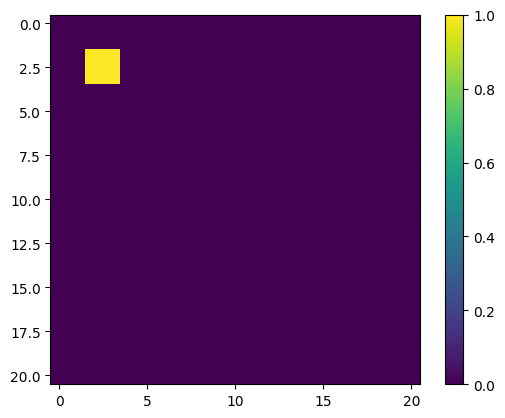

In [13]:
mean_v_fact=np.mean(v_fact[0,:,:])
print(mean_v_fact)

plt.imshow(v_fact[0,:,:])
plt.colorbar()
plt.show()

for i in range(1,v_fact.shape[0]):
    if np.mean(v_fact[i,:,:])!=mean_v_fact:
        print(i,mean_v_fact, np.mean(v_fact[i,:,:]))
        print(np.count_nonzero(v_fact[0,:,:]==1),np.count_nonzero(v_fact[i,:,:]==1))
        plt.imshow(v_fact[i,:,:])
        plt.show()

        raise AssertionError('Неправильно сгенерированы данные')

In [14]:
import collections
a = np.array(v_fact[0,:,:].flatten())
counter = collections.Counter(a)

In [15]:
counter

Counter({np.float64(0.0): 437, np.float64(1.0): 4})

In [16]:
tau,h

(0.05, 0.05)

### Проверка, что сдвиг есть и он постоянный

In [17]:
mean_v_fact_diff=np.mean(v_fact[1,:,:]-v_fact[0,:,:])
print(mean_v_fact_diff)

for i in range(1,v_fact.shape[0]):
    if np.mean(v_fact[i,:,:]-v_fact[i-1,:,:])!=mean_v_fact_diff:
        print(i,mean_v_fact, np.mean(v_fact[i,:,:]-v_fact[i-1,:,:]))
        print(np.count_nonzero(v_fact[0,:,:]==1),np.count_nonzero(v_fact[i,:,:]==1))
        plt.imshow(v_fact[i,:,:])
        plt.show()

        raise AssertionError('Неправильно сгенерированы данные')

0.0


In [18]:
tau

0.05

### Чтение данных

In [19]:
# path=fr'D:\myProjects\diplom_2\GIT_stencil-net\GIT_stencil-net\4_2d_advection'
v_fact=pickle.load(open(fr'{folder}/data.pkl','rb'))


In [20]:
v_fact.shape

(17, 21, 21)

In [21]:
import collections
a = np.array(v_fact[0,:,:].flatten())
counter = collections.Counter(a)
counter

Counter({np.float64(0.0): 437, np.float64(1.0): 4})

### Линеаризация

In [22]:
v_fact.shape

(17, 21, 21)

In [23]:
v_fact_linearizated=np.zeros((v_fact.shape[0],n*n))
for j in range(v_fact.shape[0]):
    v_fact_linearizated[j,:]=linearization(v_fact[j,:,:])
v_fact_linearizated.shape

(17, 441)

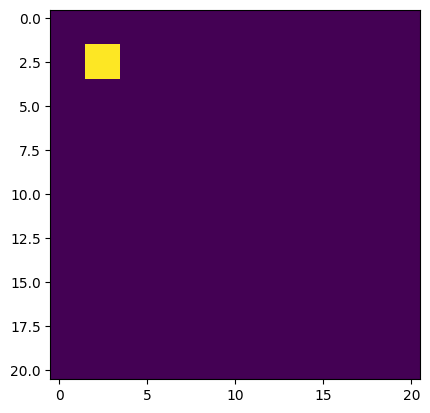

In [24]:
plt.imshow(linearization_inverse(v_fact_linearizated[0]))

### 2. Сабсемплинг

In [25]:
t_factor = 1  # time subsample factor 
s_factor = 1  # space subsample factor

# Tsim=len(v_fact[0])
# dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
# Ltc,v_coarse_train,v_coarse_test=subsampling(s_factor,t_factor,h,tau,Tsim,n,v_fact,train_split=train_split)

dxc=h
dtc=tau
# coarse_t,coarse_x = ...
v_coarse=np.copy(v_fact_linearizated)
Lxc = n*n
# Ltc=...
v_coarse_train = v_coarse.T[:,:int(v_coarse.shape[0]*train_split)]
v_coarse_test = v_coarse.T[:,int(v_coarse.shape[0]*train_split):]

In [26]:
v_coarse.shape[1]*train_split

220.5

In [27]:
v_coarse_train.shape

(441, 8)

In [28]:
v_coarse_test.shape

(441, 9)

In [ ]:
# pickle.dump(v_fact,open(folder+'/v_fact.pkl','wb'))

### 3. Тренировка модели

In [ ]:
assert 1==2, 'stop point'

In [29]:
epochs_lst,lr

([1000], 1.0)

In [30]:
folder

'Experiment_2d_advection_square_0_2'

In [31]:
for epochs in epochs_lst:
    
    net, loss_lst,loss=train_net(MLPConv,v_coarse_train,epochs,dtc,
              fs,
              neurons,
              hidden_layers_num,
              lr,
              m,
              has_backward,
              method,
              decay_const,
              bc_type=BC_TYPE,bc_values=BC_VALUES,
              verbose=True,
              verbose_step=10)
    
    pickle.dump(net, open(fr'{folder}/models/net_epochs={epochs}_device={device}', 'wb'))
    

v_train torch.Size([8, 441]) True
#parameters: 8


  0%|          | 1/1000 [00:01<19:27,  1.17s/it, loss=0.0158]

Веса после 0 эпохи:
tensor([[-1.2596],
        [ 0.1693],
        [-8.6138],
        [ 0.9085],
        [-4.1385],
        [-1.8154],
        [-3.4615]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(0.0158, grad_fn=<MeanBackward0>)


  1%|          | 11/1000 [00:14<21:20,  1.29s/it, loss=0.00376]

Веса после 10 эпохи:
tensor([[  6.9150],
        [  7.8835],
        [-18.2384],
        [ -6.4406],
        [ -3.5755],
        [  4.5550],
        [  5.9272]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(0.0038, grad_fn=<MeanBackward0>)


  2%|▏         | 21/1000 [00:27<20:12,  1.24s/it, loss=0.00164]

Веса после 20 эпохи:
tensor([[  6.8763],
        [  6.6094],
        [-25.0989],
        [ -3.3616],
        [ -0.8064],
        [  4.4954],
        [ 12.5044]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(0.0016, grad_fn=<MeanBackward0>)


  3%|▎         | 31/1000 [00:39<19:25,  1.20s/it, loss=0.000367]

Веса после 30 эпохи:
tensor([[  3.3773],
        [  3.0129],
        [-24.4694],
        [  2.4732],
        [  1.6132],
        [ -1.2864],
        [ 16.4866]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(0.0004, grad_fn=<MeanBackward0>)


  4%|▍         | 41/1000 [00:52<20:14,  1.27s/it, loss=0.000143]

Веса после 40 эпохи:
tensor([[  1.0272],
        [  0.4520],
        [-22.3269],
        [  2.7201],
        [  1.0670],
        [ -1.5622],
        [ 19.1167]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(0.0001, grad_fn=<MeanBackward0>)


  5%|▌         | 51/1000 [01:05<19:15,  1.22s/it, loss=1.16e-5] 

Веса после 50 эпохи:
tensor([[  0.2275],
        [ -0.1158],
        [-20.3295],
        [ -0.0971],
        [  0.0471],
        [  0.1052],
        [ 20.6035]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.1599e-05, grad_fn=<MeanBackward0>)


  6%|▌         | 61/1000 [01:17<18:33,  1.19s/it, loss=1.84e-5]

Веса после 60 эпохи:
tensor([[ -0.7184],
        [ -0.4519],
        [-19.1519],
        [ -0.6967],
        [ -0.3306],
        [  0.3922],
        [ 20.7255]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.8435e-05, grad_fn=<MeanBackward0>)


  7%|▋         | 71/1000 [01:28<18:07,  1.17s/it, loss=1.15e-5]

Веса после 70 эпохи:
tensor([[ -0.7653],
        [ -0.5262],
        [-19.0948],
        [ -0.1552],
        [ -0.1277],
        [ -0.1557],
        [ 20.4451]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.1470e-05, grad_fn=<MeanBackward0>)


  8%|▊         | 81/1000 [01:40<17:59,  1.17s/it, loss=1.7e-6] 

Веса после 80 эпохи:
tensor([[ -0.1406],
        [ -0.2114],
        [-19.8551],
        [ -0.0485],
        [ -0.0608],
        [  0.0543],
        [ 20.2734]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.7283e-06, grad_fn=<MeanBackward0>)


  9%|▉         | 91/1000 [01:52<17:52,  1.18s/it, loss=6e-7]  

Веса после 90 эпохи:
tensor([[  0.0848],
        [  0.0537],
        [-20.1755],
        [  0.0576],
        [  0.0631],
        [ -0.0288],
        [ 20.0614]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(5.7555e-07, grad_fn=<MeanBackward0>)


 10%|█         | 101/1000 [02:03<17:26,  1.16s/it, loss=3e-7]

Веса после 100 эпохи:
tensor([[  0.0432],
        [  0.0605],
        [-20.0959],
        [  0.0951],
        [  0.0481],
        [ -0.0565],
        [ 19.9079]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.9362e-07, grad_fn=<MeanBackward0>)


 11%|█         | 111/1000 [02:15<17:28,  1.18s/it, loss=1e-7]

Веса после 110 эпохи:
tensor([[  0.0619],
        [  0.0409],
        [-20.0080],
        [ -0.0383],
        [ -0.0264],
        [  0.0398],
        [ 19.9163]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.3331e-07, grad_fn=<MeanBackward0>)


 12%|█▏        | 121/1000 [02:27<17:26,  1.19s/it, loss=0]   

Веса после 120 эпохи:
tensor([[ 1.2426e-02],
        [ 2.0181e-02],
        [-1.9988e+01],
        [-2.4059e-02],
        [-1.1568e-02],
        [ 1.4678e-02],
        [ 1.9965e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7138e-08, grad_fn=<MeanBackward0>)


 13%|█▎        | 131/1000 [02:39<17:08,  1.18s/it, loss=0]

Веса после 130 эпохи:
tensor([[-9.5845e-03],
        [-4.1750e-03],
        [-2.0004e+01],
        [ 1.3963e-02],
        [ 6.8496e-03],
        [-1.0734e-02],
        [ 2.0005e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(7.1134e-09, grad_fn=<MeanBackward0>)


 14%|█▍        | 141/1000 [02:51<16:56,  1.18s/it, loss=0]

Веса после 140 эпохи:
tensor([[-3.8698e-04],
        [-8.5186e-03],
        [-2.0005e+01],
        [ 2.1372e-03],
        [ 1.9598e-03],
        [ 8.3801e-05],
        [ 2.0019e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(7.6331e-09, grad_fn=<MeanBackward0>)


 15%|█▌        | 151/1000 [03:02<16:35,  1.17s/it, loss=0]

Веса после 150 эпохи:
tensor([[-9.2437e-03],
        [-5.5243e-03],
        [-1.9993e+01],
        [ 5.3441e-04],
        [ 9.1575e-05],
        [-3.1649e-03],
        [ 2.0008e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.6754e-09, grad_fn=<MeanBackward0>)


 16%|█▌        | 161/1000 [03:14<16:31,  1.18s/it, loss=0]

Веса после 160 эпохи:
tensor([[-2.1591e-03],
        [-1.1605e-03],
        [-1.9995e+01],
        [-3.6447e-03],
        [-1.9399e-03],
        [ 2.2874e-03],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.1312e-10, grad_fn=<MeanBackward0>)


 17%|█▋        | 171/1000 [03:26<16:10,  1.17s/it, loss=0]

Веса после 170 эпохи:
tensor([[ 2.5978e-03],
        [ 1.4438e-03],
        [-2.0002e+01],
        [-1.3104e-04],
        [-1.9574e-04],
        [ 6.8598e-04],
        [ 1.9998e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.3662e-10, grad_fn=<MeanBackward0>)


 18%|█▊        | 181/1000 [03:38<16:12,  1.19s/it, loss=0]

Веса после 180 эпохи:
tensor([[ 1.3980e-03],
        [ 1.7002e-03],
        [-2.0003e+01],
        [ 1.9404e-03],
        [ 1.1605e-03],
        [-1.1853e-03],
        [ 1.9998e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.4176e-10, grad_fn=<MeanBackward0>)


 19%|█▉        | 191/1000 [03:50<16:50,  1.25s/it, loss=0]

Веса после 190 эпохи:
tensor([[ 6.6832e-04],
        [ 2.9080e-04],
        [-2.0000e+01],
        [-4.5846e-04],
        [-2.1605e-04],
        [ 5.4711e-04],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.6889e-11, grad_fn=<MeanBackward0>)


 20%|██        | 201/1000 [04:14<34:25,  2.59s/it, loss=0]

Веса после 200 эпохи:
tensor([[-7.4327e-04],
        [-5.0498e-04],
        [-1.9999e+01],
        [-2.0722e-04],
        [-1.9952e-04],
        [-7.2487e-05],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(9.4665e-12, grad_fn=<MeanBackward0>)


 21%|██        | 211/1000 [04:38<32:28,  2.47s/it, loss=0]

Веса после 210 эпохи:
tensor([[-2.2749e-04],
        [-1.9536e-04],
        [-2.0000e+01],
        [-1.0671e-04],
        [-1.0995e-05],
        [ 6.2591e-05],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8747e-12, grad_fn=<MeanBackward0>)


 22%|██▏       | 221/1000 [05:03<32:52,  2.53s/it, loss=0]

Веса после 220 эпохи:
tensor([[ 7.2509e-06],
        [-5.7047e-05],
        [-2.0000e+01],
        [ 1.7840e-04],
        [ 8.0168e-05],
        [-1.2377e-04],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(7.4617e-13, grad_fn=<MeanBackward0>)


 23%|██▎       | 231/1000 [05:29<33:16,  2.60s/it, loss=0]

Веса после 230 эпохи:
tensor([[ 4.9756e-05],
        [ 7.5107e-05],
        [-2.0000e+01],
        [-3.0231e-05],
        [-3.5826e-06],
        [ 2.0841e-05],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.1899e-13, grad_fn=<MeanBackward0>)


 24%|██▍       | 241/1000 [06:12<57:31,  4.55s/it, loss=0]

Веса после 240 эпохи:
tensor([[ 5.0539e-05],
        [ 4.4655e-05],
        [-2.0000e+01],
        [-4.6566e-05],
        [-3.2087e-05],
        [ 4.5373e-05],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.0946e-13, grad_fn=<MeanBackward0>)


 25%|██▌       | 251/1000 [07:01<1:04:02,  5.13s/it, loss=0]

Веса после 250 эпохи:
tensor([[ 8.4482e-06],
        [ 6.1378e-06],
        [-2.0000e+01],
        [ 3.1267e-05],
        [ 1.2139e-05],
        [-1.9411e-05],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.6462e-14, grad_fn=<MeanBackward0>)


 26%|██▌       | 261/1000 [07:30<29:41,  2.41s/it, loss=0]  

Веса после 260 эпохи:
tensor([[-6.8552e-06],
        [-7.9618e-06],
        [-2.0000e+01],
        [ 2.9471e-07],
        [ 6.2771e-06],
        [ 4.3666e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.2147e-14, grad_fn=<MeanBackward0>)


 27%|██▋       | 271/1000 [07:53<26:58,  2.22s/it, loss=0]

Веса после 270 эпохи:
tensor([[-1.9979e-05],
        [-1.6490e-05],
        [-2.0000e+01],
        [-2.3773e-06],
        [-4.8650e-06],
        [-5.2176e-06],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(9.9434e-15, grad_fn=<MeanBackward0>)


 28%|██▊       | 281/1000 [08:15<26:29,  2.21s/it, loss=0]

Веса после 280 эпохи:
tensor([[ 2.5736e-06],
        [ 3.4009e-06],
        [-2.0000e+01],
        [-7.0269e-06],
        [-2.8565e-06],
        [ 5.9693e-06],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.3843e-15, grad_fn=<MeanBackward0>)


 29%|██▉       | 291/1000 [08:38<26:32,  2.25s/it, loss=0]

Веса после 290 эпохи:
tensor([[ 2.6485e-06],
        [ 1.0764e-06],
        [-2.0000e+01],
        [ 7.6783e-06],
        [ 3.3076e-06],
        [-4.6043e-06],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.0129e-15, grad_fn=<MeanBackward0>)


 30%|███       | 301/1000 [09:00<26:08,  2.24s/it, loss=0]

Веса после 300 эпохи:
tensor([[ 2.0741e-06],
        [ 1.4308e-06],
        [-2.0000e+01],
        [-1.5873e-06],
        [-2.6223e-07],
        [ 1.7512e-06],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(1.6557e-16, grad_fn=<MeanBackward0>)


 31%|███       | 311/1000 [09:23<25:53,  2.25s/it, loss=0]

Веса после 310 эпохи:
tensor([[-9.2537e-07],
        [ 4.4647e-08],
        [-2.0000e+01],
        [-5.5604e-07],
        [-7.1596e-07],
        [ 1.8563e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.8631e-17, grad_fn=<MeanBackward0>)


 32%|███▏      | 321/1000 [09:46<26:45,  2.36s/it, loss=0]

Веса после 320 эпохи:
tensor([[ 5.7536e-07],
        [ 1.8333e-07],
        [-2.0000e+01],
        [-3.6630e-07],
        [-1.1382e-06],
        [ 3.7982e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(6.5505e-17, grad_fn=<MeanBackward0>)


 33%|███▎      | 331/1000 [10:06<21:51,  1.96s/it, loss=0]

Веса после 330 эпохи:
tensor([[ 1.9017e-07],
        [ 5.1895e-07],
        [-2.0000e+01],
        [-1.0180e-06],
        [-7.9693e-07],
        [ 6.1714e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(6.0367e-17, grad_fn=<MeanBackward0>)


 34%|███▍      | 341/1000 [10:27<23:39,  2.15s/it, loss=0]

Веса после 340 эпохи:
tensor([[ 7.5166e-07],
        [ 1.1512e-06],
        [-2.0000e+01],
        [ 1.4922e-07],
        [-3.7228e-07],
        [-5.5670e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(8.8360e-17, grad_fn=<MeanBackward0>)


 35%|███▌      | 351/1000 [10:49<23:34,  2.18s/it, loss=0]

Веса после 350 эпохи:
tensor([[ 8.5870e-07],
        [ 6.1828e-07],
        [-2.0000e+01],
        [-3.4226e-07],
        [-2.8056e-07],
        [ 6.8579e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8510e-17, grad_fn=<MeanBackward0>)


 36%|███▌      | 361/1000 [11:12<26:16,  2.47s/it, loss=0]

Веса после 360 эпохи:
tensor([[ 6.9895e-07],
        [ 6.4783e-07],
        [-2.0000e+01],
        [-2.8183e-07],
        [-1.1011e-07],
        [ 3.0912e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.3895e-17, grad_fn=<MeanBackward0>)


 37%|███▋      | 371/1000 [11:37<24:15,  2.31s/it, loss=0]

Веса после 370 эпохи:
tensor([[ 8.7982e-07],
        [ 9.0866e-07],
        [-2.0000e+01],
        [ 3.0072e-08],
        [ 5.0195e-08],
        [ 1.4235e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8360e-17, grad_fn=<MeanBackward0>)


 38%|███▊      | 381/1000 [11:57<20:05,  1.95s/it, loss=0]

Веса после 380 эпохи:
tensor([[ 8.9890e-07],
        [ 9.6166e-07],
        [-2.0000e+01],
        [-1.2388e-07],
        [ 9.8076e-08],
        [ 1.4900e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6788e-17, grad_fn=<MeanBackward0>)


 39%|███▉      | 391/1000 [12:18<21:45,  2.14s/it, loss=0]

Веса после 390 эпохи:
tensor([[ 8.4694e-07],
        [ 8.2236e-07],
        [-2.0000e+01],
        [-1.4738e-07],
        [-1.8604e-07],
        [ 7.8476e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6535e-17, grad_fn=<MeanBackward0>)


 40%|████      | 401/1000 [12:40<21:19,  2.14s/it, loss=0]

Веса после 400 эпохи:
tensor([[ 9.6984e-07],
        [ 8.8719e-07],
        [-2.0000e+01],
        [-9.6854e-08],
        [-1.5432e-07],
        [ 9.1012e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.9244e-17, grad_fn=<MeanBackward0>)


 41%|████      | 411/1000 [13:03<23:28,  2.39s/it, loss=0]

Веса после 410 эпохи:
tensor([[ 8.5431e-07],
        [ 9.1939e-07],
        [-2.0000e+01],
        [-1.0898e-07],
        [ 3.5150e-08],
        [ 1.5388e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6224e-17, grad_fn=<MeanBackward0>)


 42%|████▏     | 421/1000 [13:25<21:07,  2.19s/it, loss=0]

Веса после 420 эпохи:
tensor([[ 8.4360e-07],
        [ 1.0028e-06],
        [-2.0000e+01],
        [-5.4215e-08],
        [-1.6281e-07],
        [ 9.2619e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7632e-17, grad_fn=<MeanBackward0>)


 43%|████▎     | 431/1000 [13:47<21:15,  2.24s/it, loss=0]

Веса после 430 эпохи:
tensor([[ 9.1965e-07],
        [ 8.8081e-07],
        [-2.0000e+01],
        [-1.2023e-07],
        [-2.5836e-07],
        [ 6.1922e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7984e-17, grad_fn=<MeanBackward0>)


 44%|████▍     | 441/1000 [14:09<21:00,  2.25s/it, loss=0]

Веса после 440 эпохи:
tensor([[ 8.2871e-07],
        [ 8.8463e-07],
        [-2.0000e+01],
        [-1.3269e-07],
        [ 5.7698e-08],
        [ 6.8069e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5937e-17, grad_fn=<MeanBackward0>)


 45%|████▌     | 451/1000 [14:31<20:11,  2.21s/it, loss=0]

Веса после 450 эпохи:
tensor([[ 8.5318e-07],
        [ 8.5325e-07],
        [-2.0000e+01],
        [-1.3508e-07],
        [-1.9082e-07],
        [ 7.2092e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6555e-17, grad_fn=<MeanBackward0>)


 46%|████▌     | 461/1000 [14:53<19:46,  2.20s/it, loss=0]

Веса после 460 эпохи:
tensor([[ 9.0358e-07],
        [ 9.1270e-07],
        [-2.0000e+01],
        [-1.0016e-07],
        [-2.6976e-07],
        [ 6.5851e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7917e-17, grad_fn=<MeanBackward0>)


 47%|████▋     | 471/1000 [15:17<21:14,  2.41s/it, loss=0]

Веса после 470 эпохи:
tensor([[ 8.2561e-07],
        [ 9.5149e-07],
        [-2.0000e+01],
        [-9.0769e-08],
        [ 6.5663e-08],
        [ 1.0871e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5911e-17, grad_fn=<MeanBackward0>)


 48%|████▊     | 481/1000 [15:42<21:31,  2.49s/it, loss=0]

Веса после 480 эпохи:
tensor([[ 8.5848e-07],
        [ 9.2049e-07],
        [-2.0000e+01],
        [-1.0999e-07],
        [-1.9210e-07],
        [ 5.4868e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8417e-17, grad_fn=<MeanBackward0>)


 49%|████▉     | 491/1000 [16:07<19:55,  2.35s/it, loss=0]

Веса после 490 эпохи:
tensor([[ 9.0454e-07],
        [ 9.0990e-07],
        [-2.0000e+01],
        [-1.0063e-07],
        [-2.9340e-07],
        [ 4.1639e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8374e-17, grad_fn=<MeanBackward0>)


 50%|█████     | 501/1000 [16:28<16:54,  2.03s/it, loss=0]

Веса после 500 эпохи:
tensor([[ 8.2176e-07],
        [ 8.3839e-07],
        [-2.0000e+01],
        [-1.4808e-07],
        [ 7.0108e-08],
        [ 1.1646e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5599e-17, grad_fn=<MeanBackward0>)


 51%|█████     | 511/1000 [16:50<18:02,  2.21s/it, loss=0]

Веса после 510 эпохи:
tensor([[ 8.5854e-07],
        [ 8.7796e-07],
        [-2.0000e+01],
        [-1.2248e-07],
        [-1.8536e-07],
        [ 4.9568e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6446e-17, grad_fn=<MeanBackward0>)


 52%|█████▏    | 521/1000 [17:12<17:46,  2.23s/it, loss=0]

Веса после 520 эпохи:
tensor([[ 9.0714e-07],
        [ 9.8277e-07],
        [-2.0000e+01],
        [-6.1183e-08],
        [-2.9348e-07],
        [ 7.2976e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8927e-17, grad_fn=<MeanBackward0>)


 53%|█████▎    | 531/1000 [17:35<17:35,  2.25s/it, loss=0]

Веса после 530 эпохи:
tensor([[ 8.1837e-07],
        [ 8.6733e-07],
        [-2.0000e+01],
        [-1.3089e-07],
        [ 7.9290e-08],
        [ 1.1850e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5868e-17, grad_fn=<MeanBackward0>)


 54%|█████▍    | 541/1000 [17:57<16:27,  2.15s/it, loss=0]

Веса после 540 эпохи:
tensor([[ 9.0618e-07],
        [ 8.4315e-07],
        [-2.0000e+01],
        [-1.4897e-07],
        [-1.9597e-07],
        [ 7.4396e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7866e-17, grad_fn=<MeanBackward0>)


 55%|█████▌    | 551/1000 [18:19<16:43,  2.23s/it, loss=0]

Веса после 550 эпохи:
tensor([[ 9.2648e-07],
        [ 8.8679e-07],
        [-2.0000e+01],
        [-1.0300e-07],
        [-4.6979e-08],
        [ 1.5723e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6975e-17, grad_fn=<MeanBackward0>)


 56%|█████▌    | 561/1000 [18:41<16:21,  2.24s/it, loss=0]

Веса после 560 эпохи:
tensor([[ 9.2025e-07],
        [ 9.7823e-07],
        [-2.0000e+01],
        [-7.5562e-08],
        [-2.6194e-07],
        [ 9.1416e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8051e-17, grad_fn=<MeanBackward0>)


 57%|█████▋    | 571/1000 [19:05<18:39,  2.61s/it, loss=0]

Веса после 570 эпохи:
tensor([[ 7.5996e-07],
        [ 8.6926e-07],
        [-2.0000e+01],
        [-1.1856e-07],
        [-2.8959e-08],
        [ 1.2274e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5489e-17, grad_fn=<MeanBackward0>)


 58%|█████▊    | 581/1000 [20:02<39:47,  5.70s/it, loss=0]

Веса после 580 эпохи:
tensor([[ 8.9366e-07],
        [ 8.4114e-07],
        [-2.0000e+01],
        [-1.3101e-07],
        [-1.0562e-07],
        [ 1.7429e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.9259e-17, grad_fn=<MeanBackward0>)


 59%|█████▉    | 591/1000 [20:59<38:41,  5.68s/it, loss=0]

Веса после 590 эпохи:
tensor([[ 8.8227e-07],
        [ 8.8505e-07],
        [-2.0000e+01],
        [-1.0642e-07],
        [-2.9942e-07],
        [ 9.2648e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6796e-17, grad_fn=<MeanBackward0>)


 60%|██████    | 601/1000 [21:56<38:05,  5.73s/it, loss=0]

Веса после 600 эпохи:
tensor([[ 8.1160e-07],
        [ 9.8383e-07],
        [-2.0000e+01],
        [-6.5491e-08],
        [ 9.5667e-08],
        [ 1.2925e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7251e-17, grad_fn=<MeanBackward0>)


 61%|██████    | 611/1000 [22:47<37:29,  5.78s/it, loss=0]

Веса после 610 эпохи:
tensor([[ 8.1613e-07],
        [ 8.6788e-07],
        [-2.0000e+01],
        [-1.2166e-07],
        [ 1.6551e-08],
        [ 1.7406e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8165e-17, grad_fn=<MeanBackward0>)


 62%|██████▏   | 621/1000 [23:47<37:30,  5.94s/it, loss=0]

Веса после 620 эпохи:
tensor([[ 9.3643e-07],
        [ 8.3856e-07],
        [-2.0000e+01],
        [-1.2850e-07],
        [-6.0839e-09],
        [ 1.5154e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.1311e-17, grad_fn=<MeanBackward0>)


 63%|██████▎   | 631/1000 [24:46<36:35,  5.95s/it, loss=0]

Веса после 630 эпохи:
tensor([[ 9.3284e-07],
        [ 8.8507e-07],
        [-2.0000e+01],
        [-9.4766e-08],
        [-1.1186e-07],
        [ 1.7930e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7723e-17, grad_fn=<MeanBackward0>)


 64%|██████▍   | 641/1000 [25:43<33:26,  5.59s/it, loss=0]

Веса после 640 эпохи:
tensor([[ 8.2997e-07],
        [ 9.8750e-07],
        [-2.0000e+01],
        [-7.1027e-08],
        [-5.1205e-08],
        [ 3.3245e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.1232e-17, grad_fn=<MeanBackward0>)


 65%|██████▌   | 651/1000 [26:44<37:57,  6.52s/it, loss=0]

Веса после 650 эпохи:
tensor([[ 8.3474e-07],
        [ 8.6812e-07],
        [-2.0000e+01],
        [-1.4621e-07],
        [ 3.5675e-09],
        [ 4.5804e-09],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.9530e-17, grad_fn=<MeanBackward0>)


 66%|██████▌   | 661/1000 [27:40<31:19,  5.54s/it, loss=0]

Веса после 660 эпохи:
tensor([[ 8.7839e-07],
        [ 8.3545e-07],
        [-2.0000e+01],
        [-1.6631e-07],
        [-2.2428e-07],
        [-3.7572e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.5414e-17, grad_fn=<MeanBackward0>)


 67%|██████▋   | 671/1000 [28:34<28:23,  5.18s/it, loss=0]

Веса после 670 эпохи:
tensor([[ 8.8373e-07],
        [ 8.8578e-07],
        [-2.0000e+01],
        [-9.9677e-08],
        [-2.9246e-07],
        [ 1.0127e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8998e-17, grad_fn=<MeanBackward0>)


 68%|██████▊   | 681/1000 [29:26<28:51,  5.43s/it, loss=0]

Веса после 680 эпохи:
tensor([[ 9.0468e-07],
        [ 9.9122e-07],
        [-2.0000e+01],
        [-6.6365e-08],
        [-2.1878e-07],
        [ 1.3525e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.9428e-17, grad_fn=<MeanBackward0>)


 69%|██████▉   | 691/1000 [30:22<28:58,  5.63s/it, loss=0]

Веса после 690 эпохи:
tensor([[ 8.8054e-07],
        [ 8.6692e-07],
        [-2.0000e+01],
        [-1.1073e-07],
        [-6.8939e-08],
        [ 1.5750e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7351e-17, grad_fn=<MeanBackward0>)


 70%|███████   | 701/1000 [31:18<28:07,  5.65s/it, loss=0]

Веса после 700 эпохи:
tensor([[ 8.5640e-07],
        [ 8.3275e-07],
        [-2.0000e+01],
        [-1.6189e-07],
        [-2.5622e-07],
        [ 4.3306e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7145e-17, grad_fn=<MeanBackward0>)


 71%|███████   | 711/1000 [32:15<27:23,  5.69s/it, loss=0]

Веса после 710 эпохи:
tensor([[ 9.6522e-07],
        [ 8.8540e-07],
        [-2.0000e+01],
        [-1.1575e-07],
        [ 3.2257e-08],
        [ 1.1825e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.8350e-17, grad_fn=<MeanBackward0>)


 72%|███████▏  | 721/1000 [33:12<26:38,  5.73s/it, loss=0]

Веса после 720 эпохи:
tensor([[ 9.2618e-07],
        [ 9.9573e-07],
        [-2.0000e+01],
        [-5.8716e-08],
        [-2.9380e-08],
        [-7.6733e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6931e-17, grad_fn=<MeanBackward0>)


 73%|███████▎  | 731/1000 [34:08<25:10,  5.62s/it, loss=0]

Веса после 730 эпохи:
tensor([[ 8.5773e-07],
        [ 8.6567e-07],
        [-2.0000e+01],
        [-2.0251e-07],
        [-9.6539e-08],
        [-1.3107e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.5938e-17, grad_fn=<MeanBackward0>)


 74%|███████▍  | 741/1000 [34:52<14:32,  3.37s/it, loss=0]

Веса после 740 эпохи:
tensor([[ 8.7344e-07],
        [ 8.2998e-07],
        [-2.0000e+01],
        [-1.5785e-07],
        [ 2.9870e-08],
        [ 7.5039e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7802e-17, grad_fn=<MeanBackward0>)


 75%|███████▌  | 751/1000 [35:13<08:58,  2.16s/it, loss=0]

Веса после 750 эпохи:
tensor([[ 8.5640e-07],
        [ 8.8641e-07],
        [-2.0000e+01],
        [-1.1920e-07],
        [-2.3686e-07],
        [ 1.0634e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6507e-17, grad_fn=<MeanBackward0>)


 76%|███████▌  | 761/1000 [35:35<08:46,  2.20s/it, loss=0]

Веса после 760 эпохи:
tensor([[ 9.6791e-07],
        [ 9.9984e-07],
        [-2.0000e+01],
        [-4.3390e-08],
        [ 1.8624e-08],
        [ 1.9488e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(2.9836e-17, grad_fn=<MeanBackward0>)


 77%|███████▋  | 771/1000 [35:57<08:26,  2.21s/it, loss=0]

Веса после 770 эпохи:
tensor([[ 9.3432e-07],
        [ 8.6407e-07],
        [-2.0000e+01],
        [-1.1847e-07],
        [-1.0459e-07],
        [-9.9365e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6827e-17, grad_fn=<MeanBackward0>)


 78%|███████▊  | 781/1000 [36:20<08:05,  2.22s/it, loss=0]

Веса после 780 эпохи:
tensor([[ 7.2499e-07],
        [ 8.2848e-07],
        [-2.0000e+01],
        [-2.1984e-07],
        [ 1.7782e-07],
        [-1.1124e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5698e-17, grad_fn=<MeanBackward0>)


 79%|███████▉  | 791/1000 [36:42<07:45,  2.23s/it, loss=0]

Веса после 790 эпохи:
tensor([[ 8.5849e-07],
        [ 8.8622e-07],
        [-2.0000e+01],
        [-9.2391e-08],
        [ 7.0519e-08],
        [-2.7706e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6162e-17, grad_fn=<MeanBackward0>)


 80%|████████  | 801/1000 [37:04<07:20,  2.21s/it, loss=0]

Веса после 800 эпохи:
tensor([[ 8.6187e-07],
        [ 1.0054e-06],
        [-2.0000e+01],
        [-1.3490e-07],
        [-3.0870e-07],
        [-6.1066e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7714e-17, grad_fn=<MeanBackward0>)


 81%|████████  | 811/1000 [37:27<07:00,  2.22s/it, loss=0]

Веса после 810 эпохи:
tensor([[ 9.9061e-07],
        [ 8.6229e-07],
        [-2.0000e+01],
        [-1.0766e-07],
        [ 1.3204e-07],
        [ 1.3691e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7610e-17, grad_fn=<MeanBackward0>)


 82%|████████▏ | 821/1000 [37:49<06:32,  2.20s/it, loss=0]

Веса после 820 эпохи:
tensor([[ 9.3027e-07],
        [ 8.2612e-07],
        [-2.0000e+01],
        [-1.5183e-07],
        [-3.6784e-07],
        [ 5.3370e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.9016e-17, grad_fn=<MeanBackward0>)


 83%|████████▎ | 831/1000 [38:15<07:37,  2.71s/it, loss=0]

Веса после 830 эпохи:
tensor([[ 8.8410e-07],
        [ 8.8481e-07],
        [-2.0000e+01],
        [-1.0864e-07],
        [-1.0218e-07],
        [ 1.5070e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.5997e-17, grad_fn=<MeanBackward0>)


 84%|████████▍ | 841/1000 [38:42<07:09,  2.70s/it, loss=0]

Веса после 840 эпохи:
tensor([[ 6.8045e-07],
        [ 1.0106e-06],
        [-2.0000e+01],
        [-6.0241e-08],
        [-9.6513e-08],
        [ 1.0888e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.5852e-17, grad_fn=<MeanBackward0>)


 85%|████████▌ | 851/1000 [39:09<06:33,  2.64s/it, loss=0]

Веса после 850 эпохи:
tensor([[ 8.2152e-07],
        [ 8.6236e-07],
        [-2.0000e+01],
        [-7.0360e-08],
        [-4.2096e-08],
        [ 7.8759e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6482e-17, grad_fn=<MeanBackward0>)


 86%|████████▌ | 861/1000 [39:36<06:17,  2.72s/it, loss=0]

Веса после 860 эпохи:
tensor([[ 9.0366e-07],
        [ 8.2238e-07],
        [-2.0000e+01],
        [-1.7498e-07],
        [-3.8147e-08],
        [ 2.2235e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7347e-17, grad_fn=<MeanBackward0>)


 87%|████████▋ | 871/1000 [40:04<05:58,  2.78s/it, loss=0]

Веса после 870 эпохи:
tensor([[ 9.5615e-07],
        [ 8.8514e-07],
        [-2.0000e+01],
        [-9.3569e-08],
        [-4.0976e-07],
        [ 2.5028e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8696e-17, grad_fn=<MeanBackward0>)


 88%|████████▊ | 881/1000 [40:33<05:42,  2.88s/it, loss=0]

Веса после 880 эпохи:
tensor([[ 9.0234e-07],
        [ 1.0145e-06],
        [-2.0000e+01],
        [-6.1148e-08],
        [-1.7485e-07],
        [ 1.3339e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.7327e-17, grad_fn=<MeanBackward0>)


 89%|████████▉ | 891/1000 [41:02<05:22,  2.96s/it, loss=0]

Веса после 890 эпохи:
tensor([[ 8.7077e-07],
        [ 8.6064e-07],
        [-2.0000e+01],
        [-1.2075e-07],
        [-3.8513e-08],
        [ 1.4349e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7058e-17, grad_fn=<MeanBackward0>)


 90%|█████████ | 901/1000 [41:31<04:46,  2.90s/it, loss=0]

Веса после 900 эпохи:
tensor([[ 6.9640e-07],
        [ 8.2141e-07],
        [-2.0000e+01],
        [-1.6340e-07],
        [-3.2216e-07],
        [ 2.9367e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7251e-17, grad_fn=<MeanBackward0>)


 91%|█████████ | 911/1000 [41:59<03:58,  2.69s/it, loss=0]

Веса после 910 эпохи:
tensor([[ 8.4887e-07],
        [ 8.8548e-07],
        [-2.0000e+01],
        [-3.0537e-08],
        [-3.9975e-07],
        [ 2.4097e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6899e-17, grad_fn=<MeanBackward0>)


 92%|█████████▏| 921/1000 [42:26<03:31,  2.67s/it, loss=0]

Веса после 920 эпохи:
tensor([[ 9.7687e-07],
        [ 1.0189e-06],
        [-2.0000e+01],
        [-2.1098e-08],
        [-1.0426e-07],
        [ 3.4872e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.9059e-17, grad_fn=<MeanBackward0>)


 93%|█████████▎| 931/1000 [42:52<03:02,  2.64s/it, loss=0]

Веса после 930 эпохи:
tensor([[ 8.6042e-07],
        [ 8.6015e-07],
        [-2.0000e+01],
        [-9.9936e-08],
        [-1.3447e-07],
        [ 2.0432e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.7998e-17, grad_fn=<MeanBackward0>)


 94%|█████████▍| 941/1000 [43:19<02:39,  2.71s/it, loss=0]

Веса после 940 эпохи:
tensor([[ 1.0038e-06],
        [ 8.1703e-07],
        [-2.0000e+01],
        [-1.7282e-07],
        [-4.9893e-08],
        [-1.1175e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6793e-17, grad_fn=<MeanBackward0>)


 95%|█████████▌| 951/1000 [43:47<02:13,  2.73s/it, loss=0]

Веса после 950 эпохи:
tensor([[ 9.0326e-07],
        [ 8.8437e-07],
        [-2.0000e+01],
        [-1.2240e-07],
        [-5.9738e-08],
        [ 2.1292e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8334e-17, grad_fn=<MeanBackward0>)


 96%|█████████▌| 961/1000 [44:14<01:48,  2.78s/it, loss=0]

Веса после 960 эпохи:
tensor([[ 7.9097e-07],
        [ 1.0243e-06],
        [-2.0000e+01],
        [-5.3508e-08],
        [-1.8889e-07],
        [ 8.1744e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6542e-17, grad_fn=<MeanBackward0>)


 97%|█████████▋| 971/1000 [44:43<01:20,  2.78s/it, loss=0]

Веса после 970 эпохи:
tensor([[ 7.8347e-07],
        [ 8.5923e-07],
        [-2.0000e+01],
        [-1.6388e-07],
        [-1.9400e-07],
        [-4.0166e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(4.5998e-17, grad_fn=<MeanBackward0>)


 98%|█████████▊| 981/1000 [45:11<00:54,  2.84s/it, loss=0]

Веса после 980 эпохи:
tensor([[ 1.0076e-06],
        [ 8.1259e-07],
        [-2.0000e+01],
        [-1.0102e-07],
        [-2.5698e-07],
        [ 6.1821e-08],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.8374e-17, grad_fn=<MeanBackward0>)


 99%|█████████▉| 991/1000 [45:39<00:25,  2.79s/it, loss=0]

Веса после 990 эпохи:
tensor([[ 8.7138e-07],
        [ 8.8400e-07],
        [-2.0000e+01],
        [-9.3442e-08],
        [-1.5353e-07],
        [ 3.5191e-07],
        [ 2.0000e+01]], grad_fn=<AsStridedBackward0>)
Лосс : tensor(3.6288e-17, grad_fn=<MeanBackward0>)


100%|██████████| 1000/1000 [46:03<00:00,  2.76s/it, loss=0]


In [32]:
net.layer[0].weight

Parameter containing:
tensor([[ 7.4775e-07,  9.5031e-07, -2.0000e+01, -1.5509e-08, -2.3141e-07,
          3.0863e-07,  2.0000e+01]], requires_grad=True)

In [ ]:
# assert 1==2 , 'stop point'

### 4. Симуляция прогноза моделью

In [33]:
NN_sim_lst=[]

weights=[]
biases=[]

for epochs in epochs_lst:
    
    net = pickle.load(open(fr'{folder}/models/net_epochs={epochs}_device={device}', 'rb'))
    NN_sim,T_sim,x_sim=make_simulation(net,v_coarse.T,L,Lxc,dtc,method=method,
                                              bc_type=BC_TYPE,bc_values=BC_VALUES)
    
    NN_sim_lst.append(NN_sim)

    try:
        weights.append(net.layer[0].weight.data.numpy())
    except:
        weights.append(net.layer[0].weight.cpu().data.numpy())
    biases.append(None)

100%|██████████| 16/16 [00:01<00:00, 12.24it/s]


In [39]:
weights

[array([[ 7.4775500e-07,  9.5030941e-07, -2.0000000e+01, -1.5508697e-08,
         -2.3141060e-07,  3.0862674e-07,  1.9999998e+01]], dtype=float32)]

In [34]:
net.layer[0].weight

Parameter containing:
tensor([[ 7.4775e-07,  9.5031e-07, -2.0000e+01, -1.5509e-08, -2.3141e-07,
          3.0863e-07,  2.0000e+01]], requires_grad=True)

In [35]:
torch.round(net.layer[0].weight.data,decimals=3)

tensor([[  0.,   0., -20.,  -0.,  -0.,   0.,  20.]])

In [36]:
## Точные коэффициенты неизвестны
# pd.DataFrame({'epoch':epochs_lst+[['finite_diff_methods']],
#               'coefs':weights+[[1/h/h,1/h/h,-4/h/h,1/h/h,1/h/h]],
#               'bias':biases+[[None]]})

### 5. Результаты

In [37]:
# err=np.abs(v_coarse-NN_sim)
# mae_list=[err[:,i].mean() for i in range(err.shape[1])]
# mae_df=pd.DataFrame({'method':method,'mae_list':mae_list})#.to_csv(fr'{method}_mae.csv')

---------------Epochs = 1000-------------------
[ 0  2  4  6  8 10 12 14 16 18 20] 11
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 11




done


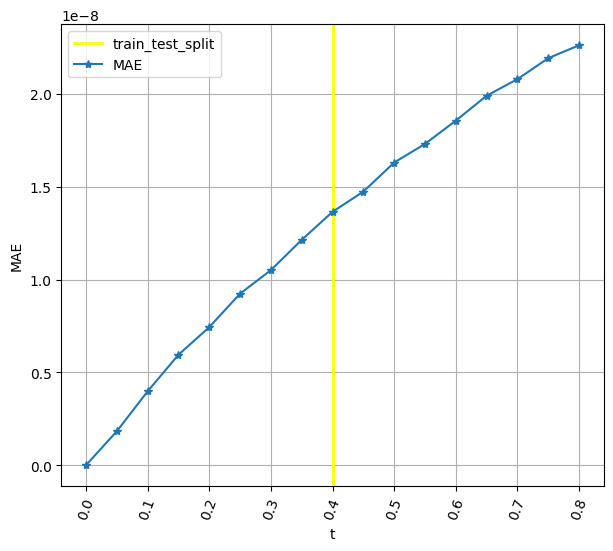

In [40]:

for i in range(len(epochs_lst)):
    
    print(fr'---------------Epochs = {epochs_lst[i]}-------------------')

    make_subplot_graphs_2d(NN_sim, v_coarse.T, x_sim, T_sim, T, dtc, 6,
                       figsize=[15,5],
                       vmin_diff=-1e-05,
                       vmax_diff=1e-05, 
                       save_flg=True,
                       save_path=folder+'/graphs/',
                       save_name=fr'SUBPLOT_by_time_{epochs_lst[i]}',
                       n_xticks=2,
                       shrink=0.5
                       )
    err=metric_by_time(NN_sim,v_coarse.T,T,dtc,ymax=None,
                save_flg=True,
                save_path=folder+'/graphs/',
                save_name=fr'MAE_by_time_{epochs_lst[i]}'
                )

    print('\n')
print('done')

In [ ]:
T,dtc

In [ ]:
len(np.arange(0, T + dtc, dtc))

In [ ]:
v_fact.shape

In [ ]:
assert 1==2,'stop point'

### cpu_vs_cuda

In [ ]:
model_cpu=pickle.load(open(fr'{folder}/models/net_epochs={epochs}_device=cpu', 'rb'))
model_cuda=pickle.load(open(fr'{folder}/models/net_epochs={epochs}_device=cuda', 'rb'))

In [ ]:
model_cpu.layer[0].weight.data.numpy()

In [ ]:
model_cuda.layer[0].weight.cpu().data.numpy()

### RK3_mae vs E1_mae

In [ ]:
rk3_mae=pd.read_csv(fr'RK3_mae.csv')
e1_mae=pd.read_csv(fr'E1_mae.csv')
plt.plot(rk3_mae['mae_list'],label='RK3')
plt.plot(e1_mae['mae_list'],label='E1')
plt.grid()
plt.legend()